Step 1: Import Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


Step 2: Generate Sine Wave Data

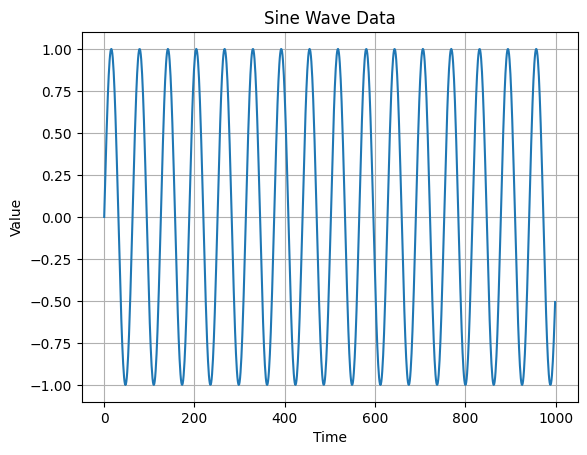

In [4]:
# Create smooth sine wave data
def generate_sine_wave(length=1000):
    x = np.linspace(0, 100, length)
    y = np.sin(x)
    return y.reshape(-1, 1)

data = generate_sine_wave()
plt.plot(data)
plt.title("Sine Wave Data")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.show()


 Step 3: Normalize and Window the Data

In [5]:
# Normalize data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Create sequences
def create_sequences(series, window=20):
    X, y = [], []
    for i in range(len(series) - window):
        X.append(series[i:i+window])
        y.append(series[i+window])
    return np.array(X), np.array(y)

window_size = 20
X, y = create_sequences(data_scaled, window_size)


Step 4: Split into Train and Test Sets

In [6]:
split_index = int(len(X) * 0.8)
X_train, y_train = X[:split_index], y[:split_index]
X_test, y_test = X[split_index:], y[split_index:]


Step 5: Define and Train the LSTM Model

In [7]:
model = Sequential([
    LSTM(50, activation='tanh', input_shape=(window_size, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.1, verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3417 - val_loss: 0.0999
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0656 - val_loss: 0.0430
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0377 - val_loss: 0.0260
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0198 - val_loss: 0.0038
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0020 - val_loss: 9.5548e-04
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 7.6727e-04 - val_loss: 5.2504e-04
Epoch 7/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.5435e-04 - val_loss: 3.6979e-04
Epoch 8/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.9857e-04 - val_loss: 1.6276e-04
Epoch 9/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.5436e-04 - val_loss: 1.1349e-04
Epoch 10/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 9.3870e-05 - val_loss: 6.8639e-05
Epoch 11/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.6737e-05 - val_loss: 5.4831e-05
Epoch 12/30

 Step 6: Make Predictions

In [8]:
y_pred = model.predict(X_test)

# Inverse transform to original scale
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


Step 7: Visualize Predictions vs Actual

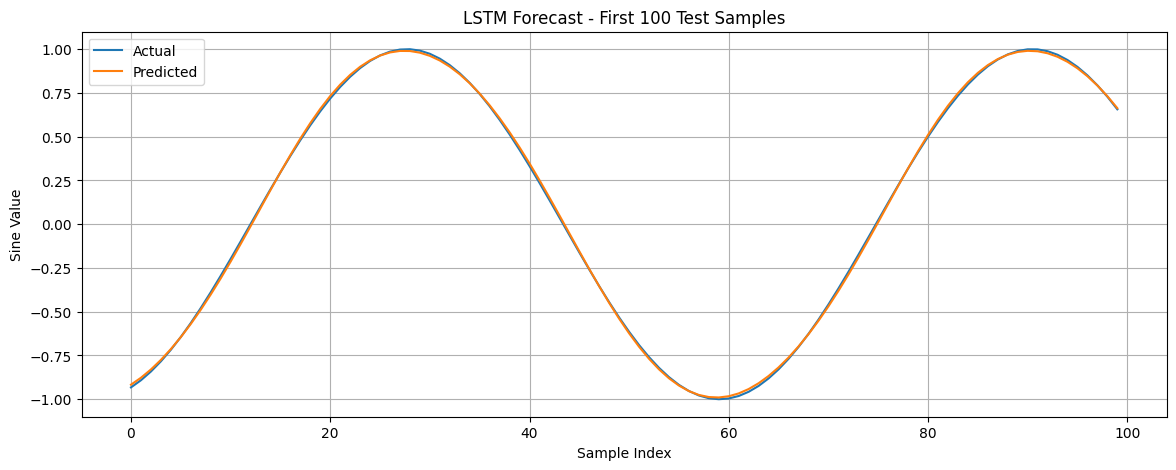

In [9]:
plt.figure(figsize=(14, 5))
plt.plot(y_test_inv[:100], label="Actual")
plt.plot(y_pred_inv[:100], label="Predicted")
plt.title("LSTM Forecast - First 100 Test Samples")
plt.xlabel("Sample Index")
plt.ylabel("Sine Value")
plt.legend()
plt.grid(True)
plt.show()


 Step 8: Evaluate the Model

In [10]:
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print(f"RMSE on Test Set: {rmse:.4f}")


RMSE on Test Set: 0.0099


Step 9: Predict Multiple Future Steps (Recursive Forecasting)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━

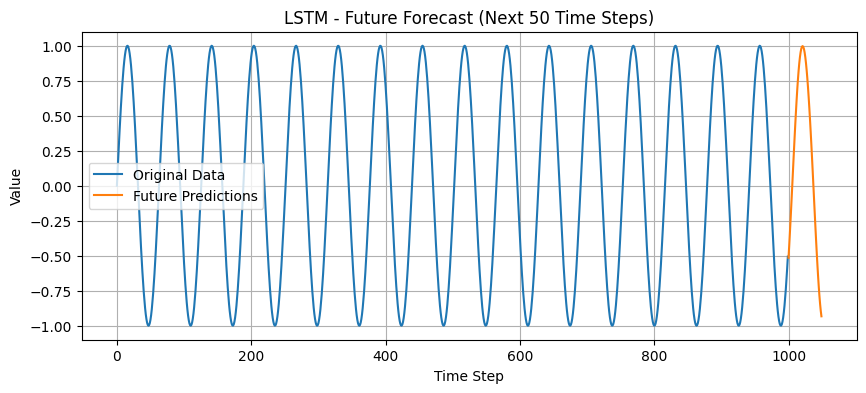

In [11]:
# Start from the last window in test data
future_input = X_test[-1].reshape(1, window_size, 1)
future_preds = []

# Predict 50 future points
for _ in range(50):
    next_pred = model.predict(future_input)[0]
    future_preds.append(next_pred)
    # slide window forward
    future_input = np.append(future_input[:, 1:, :], [[next_pred]], axis=1)

# Inverse transform and plot
future_preds_inv = scaler.inverse_transform(future_preds)

plt.figure(figsize=(10, 4))
plt.plot(np.arange(len(data)), data, label="Original Data")
plt.plot(np.arange(len(data), len(data) + 50), future_preds_inv, label="Future Predictions")
plt.title("LSTM - Future Forecast (Next 50 Time Steps)")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


In this project, I have built an LSTM-based model to forecast values in a synthetic sine wave sequence, a common benchmark for testing sequence learning. The task involved predicting the next value in a time series based on a window of previous values.

At first generated a smooth sine wave and then used a sliding window technique to convert it into supervised learning format, where each input sequence of 20 time steps was mapped to a single target value. Then normalized the data using MinMaxScaler to ensure stable learning, then split it into training and test sets.

Using TensorFlow and Keras, I created an LSTM model with 50 hidden units and trained it over 30 epochs. The model achieved very low error (RMSE) on the test set, indicating strong learning performance.

I have visualized both the predictions vs actual values on the test data and also performed recursive multi-step forecasting, where the model predicted 50 future points beyond the known data. These predictions followed the sine pattern well, demonstrating the LSTM’s ability to learn temporal dependencies.

This approach is highly applicable to real-world problems like patient monitoring, ECG trend prediction, stock forecasting, and more — wherever modeling temporal behavior is essential.